In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('train.csv')
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [3]:
print(X.shape)

(42000, 784)


In [4]:
print(y.shape)

(42000,)


In [5]:
print(y)

[1 0 1 ... 7 6 9]


In [6]:
(unique,counts) = np.unique(y,return_counts=True)

In [7]:
print(np.asarray((unique,counts)))

[[   0    1    2    3    4    5    6    7    8    9]
 [4132 4684 4177 4351 4072 3795 4137 4401 4063 4188]]


<BarContainer object of 10 artists>

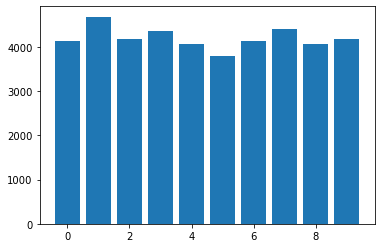

In [8]:
plt.bar(unique,counts)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [10]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X, y)

SVC(random_state=0)

In [11]:
test = pd.read_csv('test.csv').values
test = sc.transform(test)

In [12]:
print(test[0])

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.28063530e-03 -6.87837385e-03 -4.87955846e-03 -4.87955846e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.87955846e-03 -5.62918092e-03 -9.32058423e-03 -1.17998060e-02
 -1.63061719e-02 -2.03752520e-02 -2.59514740e-02 -2.99643170e-02
 -3.19107654e-02 -3.22486821e-02 -3.25422311e-02 -2.99246677e-02
 -2.98195932e-02 -2.79072967e-02 -2.35148150e-02 -1.75808468e-02
 -1.53656634e-02 -9.63815429e-03 -8.30613350e-03 -5.23595180e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.87955846e-03 -4.87955846e-03
 -8.00884680e-03 -1.14283

In [13]:
print(test.shape)

(28000, 784)


In [14]:
y_test_prediction = classifier.predict(test)

In [15]:
print(y_test_prediction.shape)

(28000,)


In [16]:
df = pd.DataFrame({"ImageId":np.arange(1,28000+1),"Label":y_test_prediction})

In [17]:
print(df.head(20))

    ImageId  Label
0         1      2
1         2      0
2         3      9
3         4      4
4         5      3
5         6      7
6         7      0
7         8      3
8         9      0
9        10      3
10       11      5
11       12      7
12       13      4
13       14      0
14       15      4
15       16      3
16       17      3
17       18      1
18       19      9
19       20      0


In [18]:
df.to_csv('Results2.csv',index=False)

In [19]:
img1 = test[0].reshape(28,28)

The digit with ImageId=1 is  2


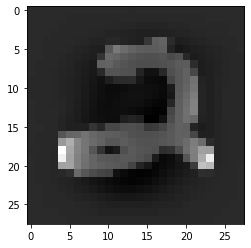

In [20]:
plt.imshow(img1,cmap='gray')
print("The digit with ImageId=1 is ",df["Label"][0])

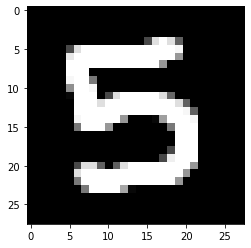

In [22]:
import cv2
img2 = cv2.imread('testImage2.png',0)
plt.imshow(img2,cmap='gray')

In [23]:
img2 = np.reshape(img2,(1,784))
img2 = sc.transform(img2)

In [24]:
classifier.predict(img2)

array([5], dtype=int64)